## Demonstration of Statistics in Python

Written by Huei-Wen Teng

Updated on 20240415


### Suppose the data is 


|X|-2|	-1	|0| 1| 	2|
|-|-|-|-|-|-|
|Y| 2| 	2| 	3| 	4| 	4| 

## (a). Let us first draw a scatter plot of the data points

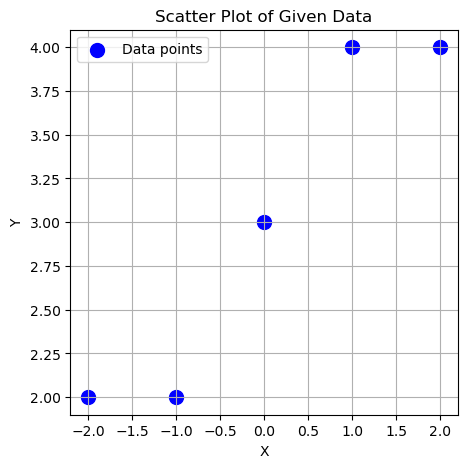

In [1]:
import numpy as np


import numpy as np
import matplotlib.pyplot as plt

# Given data for X and Y
X = np.array([-2, -1, 0, 1, 2])
Y = np.array([2, 2, 3, 4, 4])

# Create a scatter plot
plt.figure(figsize=(5, 5))
plt.scatter(X, Y, color='blue', label='Data points',facecolors='b', edgecolors='b', s=100, marker='o')
plt.title('Scatter Plot of Given Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
plt.show()


## (b) Let us calculate the following important values


In [67]:
# Step A
sum_x = X.sum()
sum_y = Y.sum()
sum_x2 = np.sum(X**2)
sum_y2 = np.sum(Y**2)
sum_xy = np.sum(X*Y)
bar_x = X.mean()
bar_y = Y.mean()

print('sum_x ', sum_x, ', sum_y ', sum_y, ', sum_x2 ', sum_x2, ', sum_y2 ', sum_y2, ', sum_xy ', sum_xy)

# Step B
S_xx = np.sum((X-bar_x)**2)
S_yy = np.sum((Y-bar_y)**2)

S_xy = np.sum((X-bar_x)*(Y-bar_y))
print('S_xx' , S_xx, 'S_yy ', S_yy, 'S_xy ', S_xy)

# Step C
b = S_xy/S_xx
a = bar_y - b * bar_x
print('a =', a, ', b =', b)

# Step D
totalSS = S_yy
SSR = S_xy**2 / S_xx
SSE = totalSS- SSR
print('totalSS ', totalSS, ', SSR ', SSR, ', SSE', SSE)

SSR_v2 = np.sum((Y - (a+b*X))**2)
print('SSR_v2 ', SSR_v2)


sum_x  0 , sum_y  15 , sum_x2  10 , sum_y2  49 , sum_xy  6
S_xx 10.0 S_yy  4.0 S_xy  6.0
a = 3.0 , b = 0.6
totalSS  4.0 , SSR  3.6 , SSE 0.3999999999999999
SSR_v2  0.3999999999999999


##  Let us find the estimated regression line and draw the regression line again 

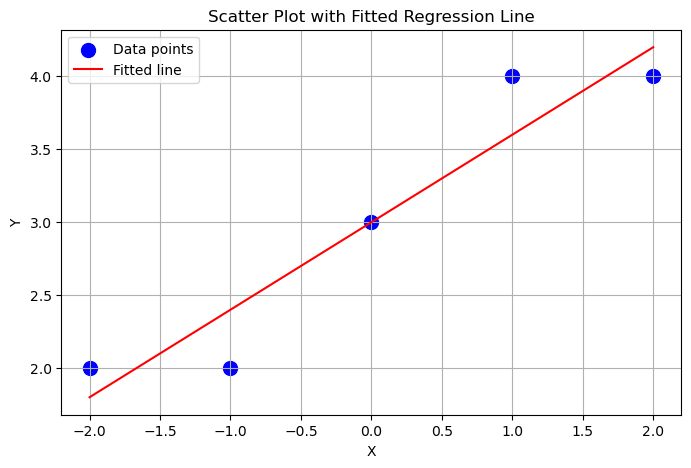

In [15]:
fitted_Y = b * X + a

plt.figure(figsize=(5, 5))
plt.scatter(X, Y, color='blue', label='Data points', s=100, marker='o')
plt.plot(X, fitted_Y, 'r-', label='Fitted line')
plt.title('Scatter Plot with Fitted Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
plt.show()


## (c) Test $H_0=\beta_0$ vs $H_1: \beta\neq 0$


- Rejection region approach: Because the $t^* =\frac{b-0}{sqrt{MSE/S_xx}} =  5.20$, it falls down into the rejection region {t:t>3.18}. We reject $H_0$
- p-value approach: Because the $p-value=0.0138$<$\alpha=0.05$, it falls down into the rejection region {t:t>3.18}. We reject $H_0$




In [57]:
t_stat = (b-0)/np.sqrt(MSE/S_xx)

t_cr = stats.t.ppf(1 - alpha/2, df_error)

p_value = 2 * stats.t.sf(np.abs(t_stat), df_error)


print(f"t_stat = {t_stat:.2f}")
print(f"The rejection region: {{t > {t_cr:.2f}}}")
print(f"The p-value = {p_value:.4f}")


t_stat = 5.20
The rejection region: {t > 3.18}
The p-value = 0.0138


## (d). Let us find the ANOVA table


From the results above, we can find the ANOVA table



In [26]:
n = len(X)
df_total = n-1
df_regression = 1
df_error = df_total - df_regression

MSR = SSR/df_regression
MSE = SSE/ df_error

F = MSR/MSE

print('Source \t SS \t df \t MS\t F')
print('Reg \t', SSR,'\t', df_regression,'\t', MSR,'\t', f"{F:.2f}")
print('Error ', '\t',f"{SSE:.2f}", '\t',df_error, '\t',f"{MSE:.2f}")
print('Total', '\t', totalSS, '\t',df_total)


Source 	 SS 	 df 	 MS	 F
Reg 	 3.6 	 1 	 3.6 	 27.00
Error  	 0.40 	 3 	 0.13
Total 	 4.0 	 4


## (e) Let us do the F-test to see if the model can be used to predict the response $y$. 



the realized statistic is $F^*=27$

#### Rejection region approach:

Because the rejectino region is {F:F>10.13}, $F^*$ falls into the rejection rejection. We reject $H_0$. We conclude the model is useful. 

#### p-value approach

Because the p-value = 0.0138 < $\alpha=0.05$. We reject $H_0$. We conclude the model is useful. 


In [32]:
import scipy.stats as stats

# Degrees of freedom
df1 = df_regression  # Example degrees of freedom for the numerator
df2 = df_error # Example degrees of freedom for the denominator

# Probability alpha for the right tail
alpha = 0.05

# Find the quantile
f_quantile = stats.f.ppf(1 - alpha, df1, df2)
print(f"F-quantile for df1={df1}, df2={df2}, and alpha={alpha}: {f_quantile:.2f}")

# Find the p-value 
p_value = stats.f.sf(F, df1, df2)
print(f"The p-value is: {p_value:.4f}")


F-quantile for df1=1, df2=3, and alpha=0.05: 10.13
The p-value is: 0.0138


## (f) Estimate the average value of $x=0$ with 95 confidence


$(a+bx)\pm\sqrt{MSE(\frac{1}{n}+\frac{(x_0-\bar{x})^2}{S_xx})} $= [2.48, 3.52] 

In [64]:
x0 = 0
t_cr = stats.t.ppf(1 - alpha/2, df_error)

ME = t_cr * np.sqrt( MSE* (1/n + ((x0-bar_x)**2/S_xx)))
LB = (a+b*x0) - ME
UB =  (a+b*x0) + ME


print(f"95% confidence interval: [ {LB:.2f} {UB:.2f}] ")

95% confidence interval: [ 2.48 3.52] 


## (f) Predict the particular value of $x=0$ with 95 confidence
$(a+bx)\pm\sqrt{MSE(1+\frac{1}{n}+\frac{(x_0-\bar{x})^2}{S_xx})} $= [1.73, 4.27] 

In [66]:
x0 = 0
t_cr = stats.t.ppf(1 - alpha/2, df_error)

ME = t_cr * np.sqrt( MSE* (1+1/n + ((x0-bar_x)**2/S_xx)))
LB = (a+b*x0) - ME
UB =  (a+b*x0) + ME


print(f"95% confidence interval: [ {LB:.2f} {UB:.2f}] ")

95% confidence interval: [ 1.73 4.27] 


## (h). Let us calculate the correlation coefficeint and do the hypothesis test.

To do $H_0: \rho = 0$ vs $H_1: \rho > 0$

Because the $r= 0.95$, the $t_{stat}=r\sqrt{\frac{n-2}{(1-r^2)}} = 5.20$

#### Rejection region approach

Because the rejection region is {t: t>2.35}, we reject H_0. We conclude that there is likely a positive correlation. 

#### p-value approach


Because the p-value = 0.0069<$\alpha=0.05$, we reject H_0. We conclude that there is likely a positive correlation. 

## Let us calculate the residuals and draw the residual plots, and the QQ plot. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


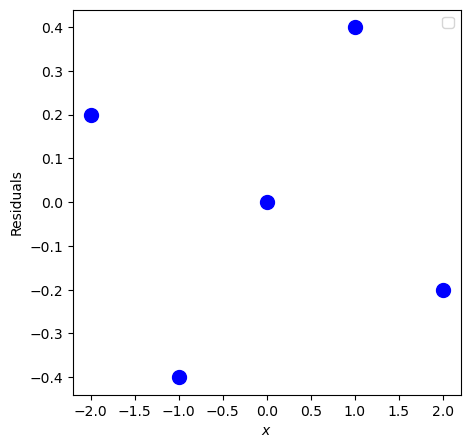

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


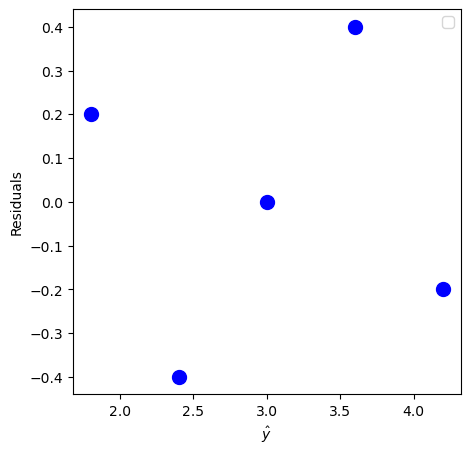

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


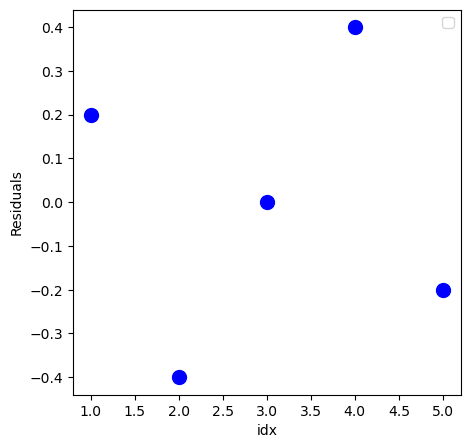

In [42]:
r = Y-(a+b*X)

plt.figure(figsize=(5, 5))
plt.scatter(X, r, color='blue',  s=100, marker='o')
plt.xlabel('$x$')
plt.ylabel('Residuals')
plt.legend()
plt.show()

plt.figure(figsize=(5, 5))
plt.scatter(fitted_Y, r, color='blue',  s=100, marker='o')
plt.xlabel('$\hat{y}$')
plt.ylabel('Residuals')
plt.legend()
plt.show()

plt.figure(figsize=(5, 5))
plt.scatter(np.arange(1, n + 1),r, color='blue',  s=100, marker='o')
plt.xlabel('idx')
plt.ylabel('Residuals')
plt.legend()
plt.show()



In [53]:
r = S_xy/np.sqrt(S_xx*S_yy)


t_stat = r*np.sqrt((n-2)/(1-r**2))

t_cr = stats.t.ppf(1 - alpha, df_error)

p_value = stats.t.sf(t_stat, df_error)

print(f"r : {r:.2f}, t_stat = {t_stat:.2f} ")
print(f"The rejection region: {{t > {t_cr:.2f}}}")
print(f"The p-value = {p_value:.4f}")

r : 0.95, t_stat = 5.20 
The rejection region: {t > 2.35}
The p-value = 0.0069


## 8. Let us repeat the above by using Python algorithm 

In [6]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform linear regression
slope, intercept, r_value, a_value, std_err = stats.linregress(X, Y)

# Print out the statistics
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")

# Perform ANOVA
# First we need to construct a DataFrame since the ols function in statsmodels works with DataFrames
data = {'X': X, 'Y': Y}
df = pd.DataFrame(data)

# Fit the model
model = ols('Y ~ X', data=df).fit()

# Perform ANOVA and get the ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


Slope: 0.6000000000000001
Intercept: 3.0
R-squared: 0.9000000000000001
P-value: 0.013846832988859015
Standard error: 0.11547005383792508


,sum_sq,df,F,PR(>F)
X,3.6,1.0,27.0,0.013847
Residual,0.4,3.0,NaN,NaN
